# Exercise 1

In this exercise, we will control a 2D drone depicted in the figure below <br>
<img src='quadrotor.png' width="300">

Consider the following simplified linear model of the drone
$$\begin{align}
    x_{n+1} = A
    x_n + B u_n
\end{align}$$

where the components of the state $x_n$ correspond to the horizontal position and velocity of the quadrotor, its vertical position and velocity and its orientation and angular velocity. The control vector
$u_n$ contains the forces produced by the rotors (our control inputs).
The module ```quadrotor.py``` defines the matrices $A$ and $B$ and code to generate a simulation of the drone.

In [4]:
## what we need to do computation and display the drone
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

import quadrotor

In [5]:
# the matrices A and B are already defined in the quadrotor module
print(f'A =\n {quadrotor.A}')
print(f'B =\n {quadrotor.B}')

A =
 [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B =
 [[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.02   0.02 ]
 [ 0.     0.   ]
 [ 0.015 -0.015]]


In [6]:
# we can display the behavior of the drone based on a given control input

# we can also start at x0 = 0 and generate a random control of 0 for 300 time steps
x0 = np.zeros((6,1))
u = np.random.rand(2,300)

quadrotor.animate_robot(x0, u, goal=[3,3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAIb1tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ETRliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwACHHgr8h1jA36boAAANaAG
nDrYXyDtwsG4ADkM2nT0QaSj1Mgzh8GOQsx6w9cThDpUwwEKhHlge0GugevniUOGp0WszRxBFR66
gzXXmL2NwrGK2g/zo7VlYAmvTA6JRKrguBRBQd6O1xLHbbVpQW0+mTVga92O7zBo2XeTeMkY9E33
7krU8FEeeRw0/MLPNBvKuo8t3pOnDcm9pL3L3OR19QN0E+nVUsu+S/oB6HbmKEJZktBAPOf8MSQh
DlYR55GSu9BJVPQTcypm5vzMQehLT3j+JvsAWcmxpoUcJfjpqSalskpMn+/FL2W7nMY+SsdGrpJ4
F4E4BY+3Gq2gWiKI59cS+0mAldKHBHHoNSuZCYA36pZet4852fNPfhSIWYlv+2HI5PP9sKgAwHVh
+Yb17TB0ukltFsXXiFuAAABrgZTmEZTzBB1YU2Ob9oySKCbVUgaWLIWPYxbC/oXaZDw9QsZ6D/SF
hJTGSRNa3fRC+hb3h9nSxqMlN97NyiDoqXBX0pEAO/+zG4k5DbXsVT5VnxHPyiV3kmW1BSofaOzu
ETJx/Woi5QN/WJSweae3zLFvR8ze07CC0eA2n/eUzjNwpXB1771oiRqc73QTO2DdFzDki5FoJaK3
iYnN3Ry1HXVb42X0J3rUbyo8ox7t+Q+obxWcCySxfvJp3LHX/1sAQzLNeqoisdK+W7AR2Pl9YgrV
acM/iS/EQdLrUi9hd9q0o5RKZ6vvAOmExiuoaoY1kRgO4Z3a27em8pQ2HTgdj5R+8hBnHAyszq7G
RHJZb4j61gXsEEh2GaCK22C9IL/pJ+0Bdl0xRg+NtYSnODkAL42sekxn5gmPDvQ2QnkiqN7zSnQb
HsVx884iNDmiwV5AjMEt//jABiLjwerNpfr2l4qnYTGP4G9e+3aPhboLFlQ/w4t/o1+3FAlCP8md
wgPhdQB7XDVojJOy6YUGfMnvehFIpF83kmHWEYUXE1kO8EySHQNOEQgruaKObcrDjV8LTfAbijC9
ub4W28bn9k4BsmC8qqoRT+/bmm5rF9MZt7Sfkhj3ngITXfsAT4MlKKYUt/UtaeeER8a8xvscZgkh
vhgBumF18h8caF0saBazt0ZP3xVVUFOA0CZfy7X1GSZLMISirVli/RGNP7NBByJRpvDCb48SK5Gj
76D6/kWc9U2/0RFcJh349Qu2uwijP7rgSpvtel+s3OJqFrcBK9gZ8bgoLnbz509ZvI19K2AohxK9
kRAPlpWnC2tH139tE0ELa1nsAKXnQGsd+BmkbDNYSDUUUavMbljpm9Abv4cPBZYGcDyWdqSMi1X/
eTVVhecQPzl/eigKs5tAp4tYvMoMZ5J/86n/2i4Oq+SseTNNB2CEXRgI4KF38fAZNeWxPShsU/c6
C8/7AFZBw9vWs8jA3hT1s8P9u9KlN/rIgyjM7WEteGuq66K7rd7ScSmiNfd0BGFgDKduMTpDArdY
gfrT1siErgr7BzcaX+IOP2K1yeses9Uh96WPDvB33Pnev+HEEpeMYxXpHdlrDZrTHoaNMlLKzF1y
/M6q7RThLP5U0tceho6MKUwABL3+7yQA9AIzg8qhGFKbnvUSe5zmqiGVMxx1i8kK+HQfzzik+605
C5CkKE4bQygwd+JEKq+g/ORpAX90Uv+iWcUuArvqzOoMEpPZ1NazSqBohNxFS7QqWtHjxir/U0rb
/xZJv+99oNpCFRlx2PazX8V1459brSPauScPsnmqLnCmmlTGwUJdVYCv1OlnyCHtL8JtgfB/7ETu
ehWet7dvm9wWCEB1moIzkUfn7VhDnxDYuS2AQqGonj2axniYyWZEd+tzDAW48CosGFTmumzz7HHF
ia99zm0xjW151lk7pFBv4Fr/qiXvozzL2jtZos84lf+Q2G1e4G1bdu+Nk0GuhUJZ0190c/kTyhkm
6t9le5Bzqh/6QdDi1IYScMRJc6Hwbys85HYxbS2wAJ1DuyuMTgdqlZ23BIDGB6rMt44lwvpgWr6P
4KJdSURe3Wodwk56dGCZuNxXvXkwXYhnawelCYAn2TeFrzkprSCBoXknPWWeH/ORoJS+n1aQpob5
3iay0qrJi92PJ9jun9PoLtA//3Kbc/7GnEaC17WbxbJfVouA4EjxjH+ova6QEKaWcpeC6LpkPXUS
xlT2lxgOK92e7+bvA0cAIHqEhE2LiG3QCrYKXO/ULTyTeziwwtDcUIjLNkUTfVQwXKsVsTum5ear
ClBqfRGA6mWPxkERKtZo5wuIvCps0x//8CaSVaJwEDE27+3XdtlaKvS2rZzvDjO2T0eK/NkdGa9J
86K/8No4TzlTerUitCU3UoFTtS/ZnjtaT5jnTMFxVvFegwfyNqenMpdgKgTyUBwMazkT2eRdi7mu
UX8lS2q7BYQPLBeESn6CS5AUGpSLh8w+3Mjv45iUS6w2f6oaqWXwAoS1fxmGb3z+rzyIFWXXUxFa
XtZJt9kwJKi/R1pLprIauSI3mLypIoYZVRbVHpF9Q+QGmW7CY2Jydcog+DxytD4e2vjfm+k3YYyX
ngsidNY09xI17CTcEqr5KNh+VTIfBERBfuBS7fwl6+oC3gWBFW0PK/nCe6B2JLc1LO/nk8YnM4wu
zU2CQhu/GZ/HuuxVF88JbpwM7/x5N2FJoO/9Wl8ZtyJXh124tTX4oTPo3A68Sq0usAmzhdaYwHZm
9SiPan9fYSyLUsO0ii95Mnt6STjn+WqGDoBP2v/8KBs1/TfKEZAkjdWY3IIuxIajhfSsel1S+OpF
mSlfM0WHQQh3hIeinKRlmm/hkxTknQp8VYsR9P9WQVzCU6rpVMy4CMMdQAABb89VLKRrqRsa74NJ
exD7y0qXsmfCUAn06514t

We want to generate a control input will move the drone towards the point $(3,3)$ starting from $(0,0)$. In order to
do so, we define a cost that penalizes the distance to the goal at each time step while minimizing velocities and the amount of trust needed,
i.e. we want to solve the following optimal control problem
$$\begin{align}
&\min_{x_0, u_0, x_1, u_1, \cdots} \frac{1}{2}\sum_{n=0}^{N} (x_n - x_{desired})^T Q (x_n - x_{desired}) + u_n^T R u_n\\
\textrm{subject to}\ \ & x_{n+1} = A x_{n} + B u_n\\
& x_0 = [0,0,0,0,0,0]^T
\end{align}$$
where $x_{desired} = [3,0,3,0,0,0]^T$

1. Write down the KKT conditions for the problem
2. Write code to solve the problem for N=500 time steps (you will need to find diagonal matrices $Q>0$ and $R>0$ to create a nice movement) by solving the KKT system of linear equations. Do NOT inverse the KKT matrix, instead use the [NumPy solve function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) which is numerically more stable and efficient.
4. Show plots of all the states of the robot as a function of time
5. Show plots of the optimal control as a function of time

## Solution (Series 1 Exercise 4, Scroll down for Solution of Series 2 Exercise 1)
### Cost Reformulation
Firstly, let us reformulate the cost as
$$\begin{equation}\notag
     \sum_{n=0}^{N} \left( \frac{1}{2} x_n^T Q x_n +  \frac{1}{2} u_n^T R u_n  - x_{desired}^T Q x_n\right)
\end{equation}$$

This gives us the optimal control problem, 
$$\begin{align}
    \notag \min_{x_0, u_0, x_1, u_1, \cdots} &\sum_{n=0}^{N} \left( \frac{1}{2} x_n^T Q x_n +  \frac{1}{2} u_n^T R u_n  - x_{desired}^T Q x_n\right) \\
    \notag \text{Subject to } x_{n+1} &= Ax_n + Bu_n \\
    \notag x_0 &= \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}^T \\
    \notag \text{Where, } x_{desired} &= \begin{bmatrix} 3 & 0 & 3 & 0 & 0 & 0 \end{bmatrix}^T
\end{align}$$

The problem can be rewritten in matrix form as
$$\begin{align}
\notag & \min_{y} \frac{1}{2} y^T G y + g^T y\\
\notag \textrm{subject to} \ \ \ \ & M y = p
\end{align}$$

Where, 
$$\begin{align}
    \notag &y = \begin{bmatrix} x_0 \\ u_0 \\ x_1 \\ u_1 \\ \vdots\end{bmatrix} && G = \begin{bmatrix} Q & 0 & 0 & 0 & \cdots\\ 0 & R & 0 & 0 & \cdots \\ 0 & 0 & Q & 0 & \cdots \\ 0 & 0 & 0 & R & \cdots \\ \vdots & \vdots & \vdots & \vdots & \ddots \end{bmatrix} &&& g^T = \begin{bmatrix} -x_{desired}^T Q  & 0 & -x_{desired}^T Q & 0 & \cdots\end{bmatrix} &&&& M = \begin{bmatrix} I & 0 & 0 & 0 & 0 & 0 & \cdots \\ A & B & -I & 0 & 0 & 0 & \cdots \\  0 & 0 & A & B & -I & 0 & \cdots \\  0 & 0 & 0 & 0 & A & B & \cdots \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\ \end{bmatrix} &&&&& p = \begin{bmatrix} x_{0} \\ 0 \\ 0 \\ 0 \\ \vdots\end{bmatrix}
\end{align}
$$

### KKT Conditions
Now, we can formulate the Lagrangian as, 
$$L\begin{equation} \notag
(y,\lambda) = \frac{1}{2} y^T G y + g^T y + \lambda^T (M y - p)
\end{equation}$$
and the KKT conditions for optimality are
$$ \begin{bmatrix} G & M^T \\ M & 0 \end{bmatrix} \begin{pmatrix} y \\ \lambda \end{pmatrix} = \begin{pmatrix} -g \\ p \end{pmatrix}$$

In [7]:
## write down your code here
N = 500

Q = np.array([1, 1, 1, 1, 1, 1])
R = np.array([1, 1])
QR_blocks = [np.diag(np.concatenate((Q, R)))] * N
G = block_diag(*QR_blocks)

x_desired = np.array([3, 0, 3, 0, 0, 0]).reshape(6,1)
g_blocks = np.concatenate(x_desired )
g = 

evals_g = np.linalg.eigvals(G)
for i in evals_g:
    if i < 0:
        raise ValueError("G is neither Positive definite nor Semidefinite")

M = np.hstack((-np.eye((6,6)), np.zeros((6, (G.shape[1]-6)))))
ABmI = np.hstack((quadrotor.A, quadrotor.B, -np.eye(6)))
for i in range(0, N-1):
    temp = np.hstack((np.zeros((6, 8*i)), ABmI,
                     np.zeros((6, G.shape[1] - ((8*i) + ABmI.shape[1])))))
    M = np.vstack((M, temp))

x_desired = np.array([[3., 0., 3., 0., 0., 0.]]).T

A = np.vstack((np.hstack((G, M.T)), np.hstack((M, np.zeros((M.shape[0], M.shape[0]))))))

b = np.vstack((np.zeros((G.shape[0], 1)), (x_desired),
              np.zeros((M.shape[0]-x_desired.shape[0], 1))))
    
y = np.linalg.solve(A, b)
x = np.zeros((6, N))
u = np.zeros((2, N))
for i in range(0, N):
    x[:, i] = y[(i*6):((i*6)+6), 0]
    u[:, i] = y[((i*6)+6):(((i*6)+6)+2), 0]

print(f"\n\nFinal State = {np.round(x[:, N-1], 5)}")
print(f"U1 : Max = {round(u[0].max(), 5)}, Min = {round(u[0].min(), 5)}")
print(f"U2 : Max = {round(u[1].max(), 5)}, Min = {round(u[1].min(), 5)}")

quadrotor.animate_robot(x0, u, goal=[3,3])


TypeError: 'tuple' object cannot be interpreted as an integer

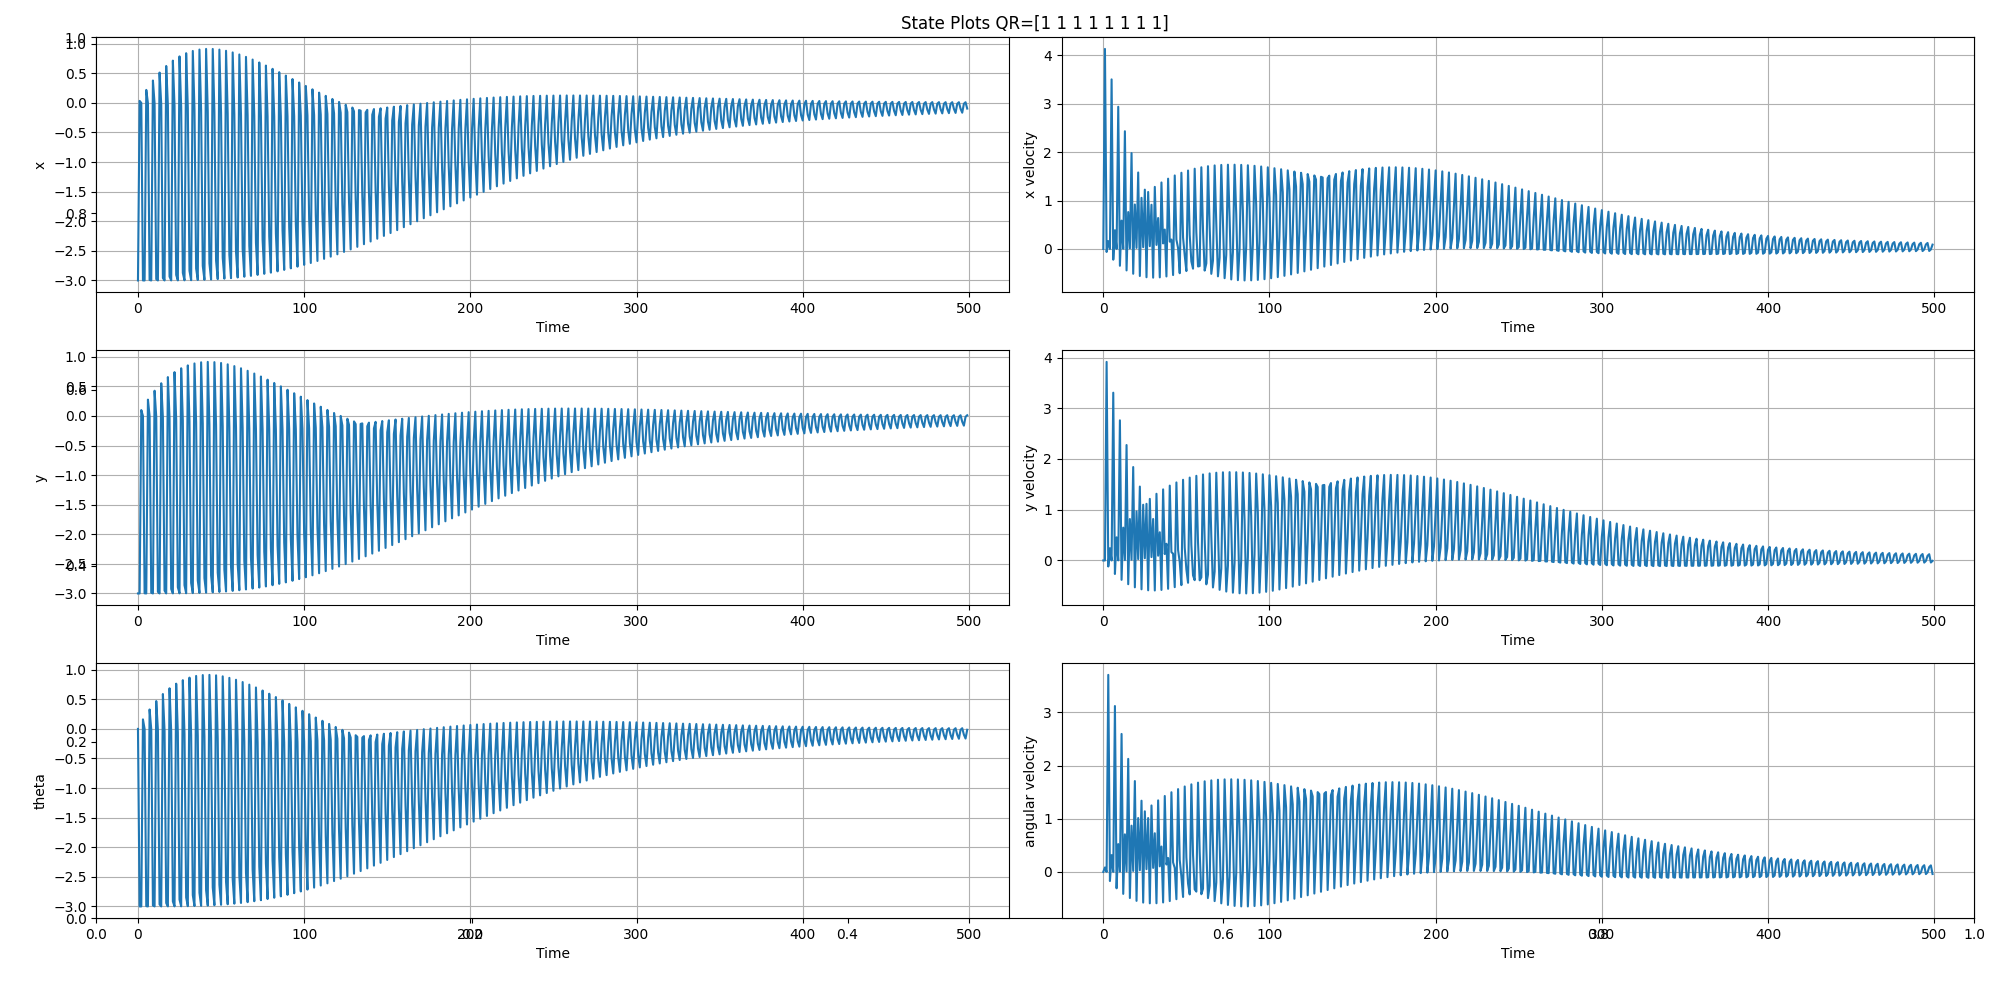

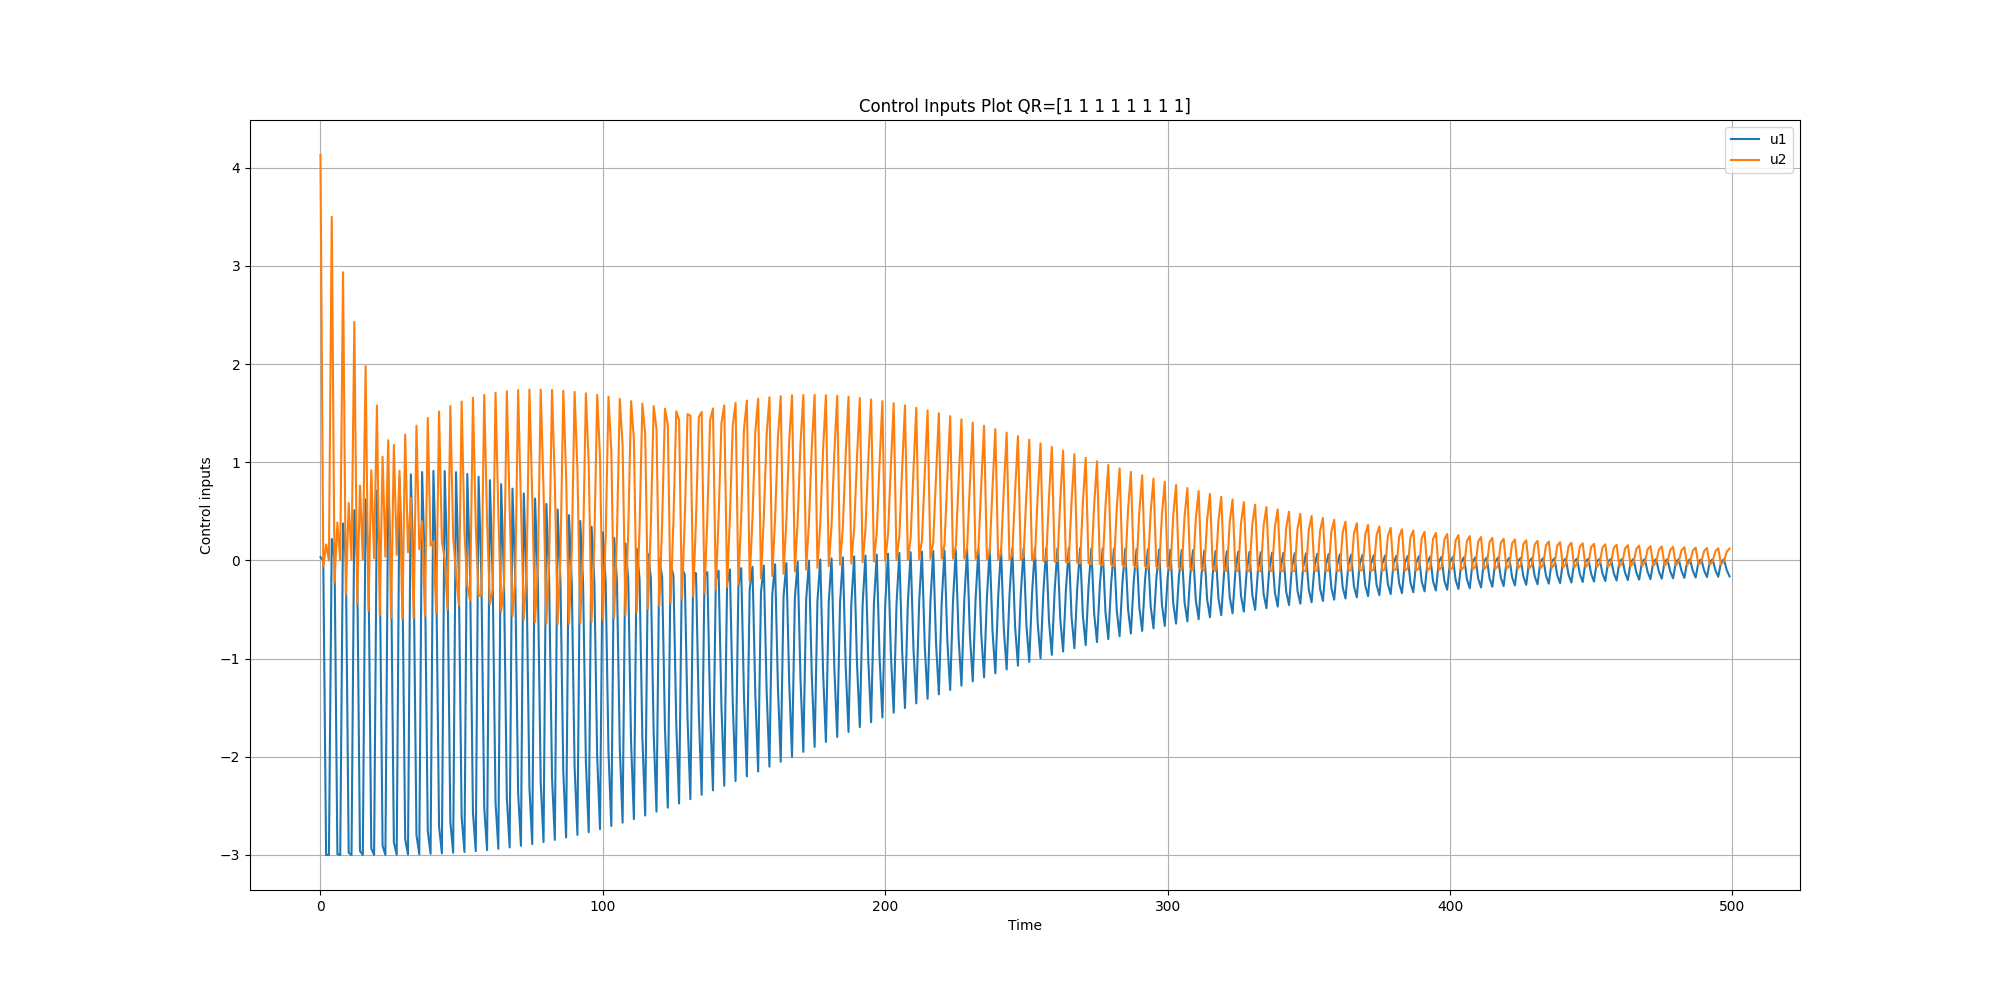

In [25]:
# Plot states over time
time = np.arange(N)
# Plot x position
plt.figure(figsize=(20, 10))
plt.title(f"State Plots QR={QR.diagonal()}")
plt.subplot(3, 2, 1)
plt.plot(time, x[0, :], label='x position')
plt.xlabel('Time')
plt.ylabel('x')
plt.grid(True)
# Plot x velocity
plt.subplot(3, 2, 2)
plt.plot(time, x[1, :], label='x velocity')
plt.xlabel('Time')
plt.ylabel('x velocity')
plt.grid(True)
# Plot y position
plt.subplot(3, 2, 3)
plt.plot(time, x[2, :], label='y position')
plt.xlabel('Time')
plt.ylabel('y')
plt.grid(True)
# Plot y velocity
plt.subplot(3, 2, 4)
plt.plot(time, x[3, :], label='y velocity')
plt.xlabel('Time')
plt.ylabel('y velocity')
plt.grid(True)
# Plot theta
plt.subplot(3, 2, 5)
plt.plot(time, x[4, :], label='theta')
plt.xlabel('Time')
plt.ylabel('theta')
plt.grid(True)
# Plot theta velocity
plt.subplot(3, 2, 6)
plt.plot(time, x[5, :], label='angular velocity')
plt.xlabel('Time')
plt.ylabel('angular velocity')
plt.grid(True)
plt.tight_layout()
# plt.savefig(state_plot_filename)
plt.show()

# Plot control inputs
plt.figure(figsize=(20, 10))
plt.title(f"Control Inputs Plot QR={QR.diagonal()}")
plt.plot(np.arange(N), u[0, :], label='u1')
plt.plot(np.arange(N), u[1, :], label='u2')
plt.xlabel('Time')
plt.ylabel('Control inputs')
plt.legend()
plt.grid(True)
# plt.savefig(control_ip_filename)
plt.show()